# Lungs Tumor Segmentation

In [1]:
from src.data_module import DecathlonDataModule
from monai.utils import first

In [2]:
import os 
PROJECT_DIR = "/Users/matij/Downloads/lung-tumours-segmentation-main"
os.chdir(PROJECT_DIR)

In [3]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
dm = DecathlonDataModule(
        root_dir="./data",
        task="Task06_Lung",
        batch_size=1,
        num_workers=0,
    )

dm.setup()

C:\Users\matij\anaconda3\Lib\site-packages\monai\utils\deprecate_utils.py:321: FutureWarning: monai.transforms.croppad.dictionary CropForegroundd.__init__:allow_smaller: Current default value of argument `allow_smaller=True` has been deprecated since version 1.2. It will be changed to `allow_smaller=False` in version 1.5.
  warn_deprecated(argname, msg, warning_category)


2024-07-03 17:39:06,430 - INFO - Verified 'Task06_Lung.tar', md5: 8afd997733c7fc0432f71255ba4e52dc.
2024-07-03 17:39:06,431 - INFO - File exists: C:\Users\matij\Downloads\lung-tumours-segmentation-main\data\Task06_Lung.tar, skipped downloading.
2024-07-03 17:39:06,432 - INFO - Non-empty folder exists in C:\Users\matij\Downloads\lung-tumours-segmentation-main\data\Task06_Lung, skipped extracting.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_random_slices_with_segmentation(image, label, num_slices=16):
    """
    Plots random slices where each slice has segmentation values in the label.

    Parameters:
        image (torch.Tensor): 3D tensor representing the image.
        label (torch.Tensor): 3D tensor representing the segmentation label.
        num_slices (int): Number of slices to plot. Default is 16.
    """

    max_slices = image.shape[-1]
    random_slice_indices = np.random.choice(max_slices, size=min(num_slices, max_slices), replace=False)

    cols = 4
    rows = len(random_slice_indices) // cols

    fig, axes = plt.subplots(rows, cols, figsize =(16,16))
    axes = axes.flatten()

    for i, idx in enumerate(random_slice_indices):
        slice_image = image[:,:,idx]
        slice_label = label[:,:,idx]

        # Plot the image slice
        axes[i].imshow(slice_image, cmap='gray')
        axes[i].set_title(f"Slice {idx + 1}")

        # Overlay segmentation mask on the image
        axes[i].imshow(slice_label, cmap='jet', alpha=0.5)

        # axes[i].axis('off')

    plt.tight_layout()
    plt.show()


image shape: torch.Size([128, 128, 128]), label shape: torch.Size([128, 128, 128])


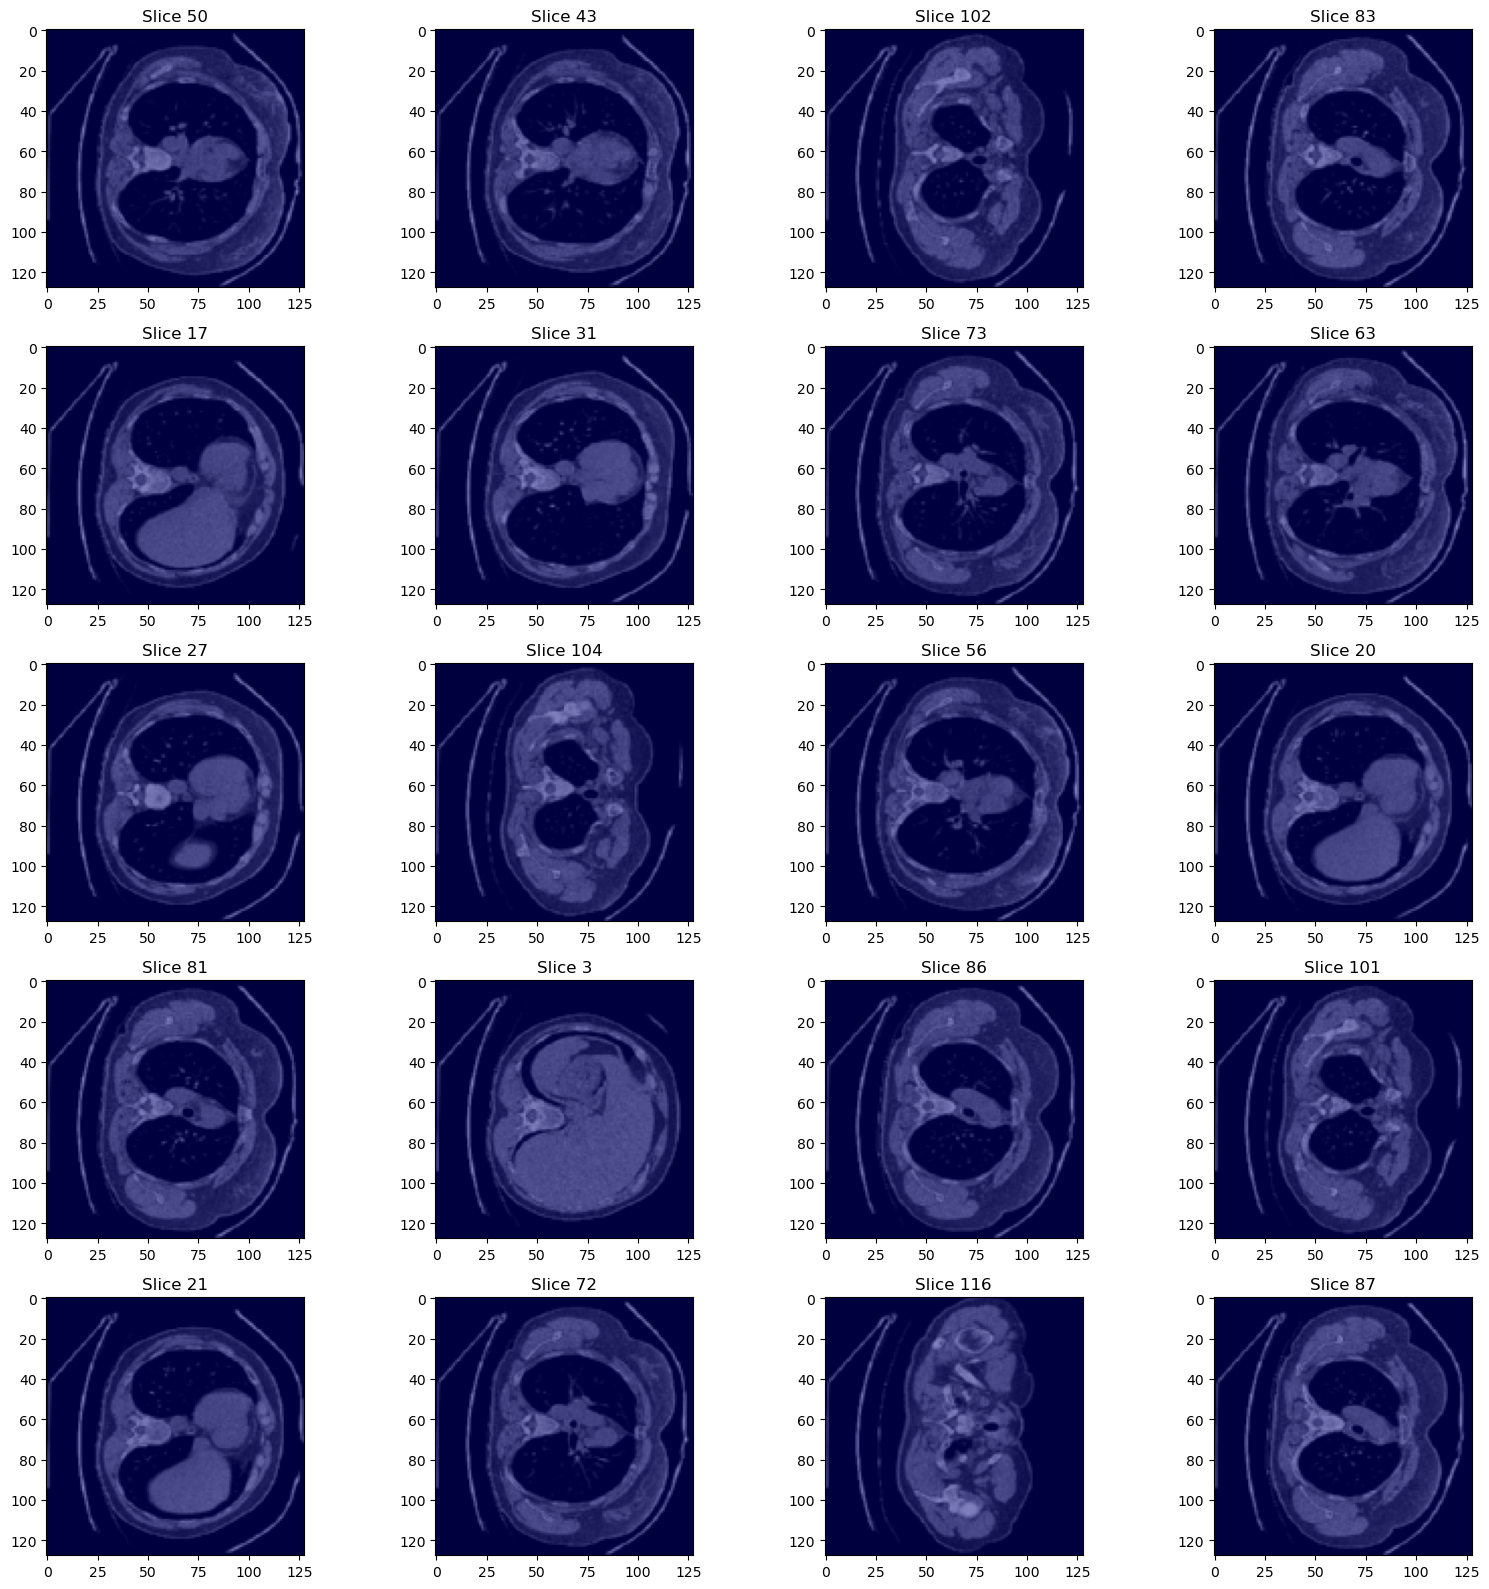

In [6]:
# Plot random 16 slices
check_data = first(dm.train_dataloader())
image, label = (check_data["image"][0][0], check_data["label"][0][0])
print(f"image shape: {image.shape}, label shape: {label.shape}")
plot_random_slices_with_segmentation(image, label, num_slices=20)

image shape: torch.Size([128, 128, 128]), label shape: torch.Size([128, 128, 128])


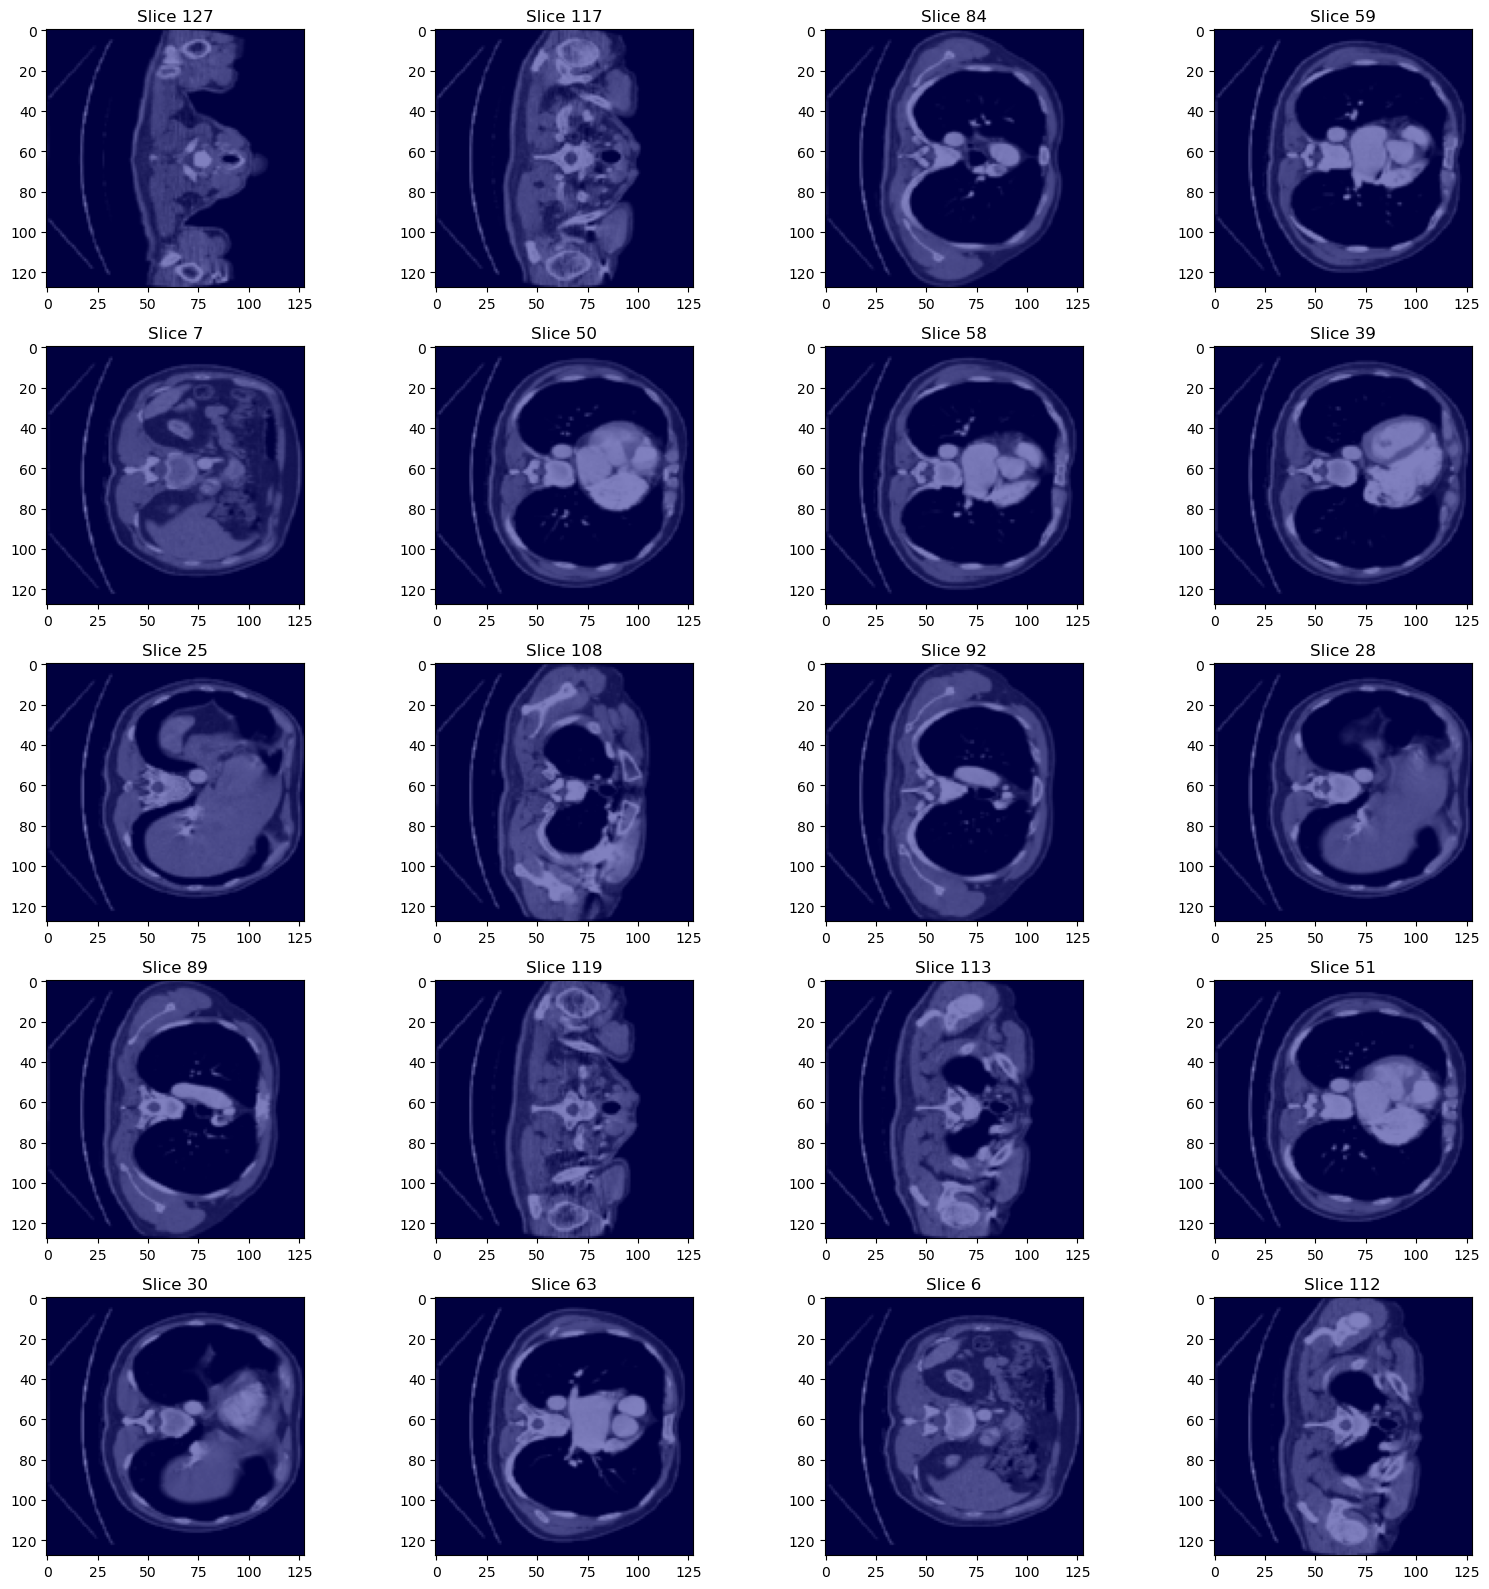

In [7]:
# Plot random 16 slices
check_data = first(dm.train_dataloader())
image, label = (check_data["image"][0][0], check_data["label"][0][0])
print(f"image shape: {image.shape}, label shape: {label.shape}")
plot_random_slices_with_segmentation(image, label, num_slices=20)

In [8]:
import nibabel as nib

file_path = 'data/Task06_Lung/imagesTr/lung_065.nii.gz'
img = nib.load(file_path)
img_data = img.get_fdata()
print(f"Image shape: {img_data.shape}")


Image shape: (512, 512, 128)


usage: ipykernel_launcher.py [--help] [--hydra-help] [--version]
                             [--cfg {job,hydra,all}] [--resolve]
                             [--package PACKAGE] [--run] [--multirun]
                             [--shell-completion] [--config-path CONFIG_PATH]
                             [--config-name CONFIG_NAME]
                             [--config-dir CONFIG_DIR]
                             [--experimental-rerun EXPERIMENTAL_RERUN]
                             [--info [{all,config,defaults,defaults-tree,plugins,searchpath}]]
                             [overrides ...]
ipykernel_launcher.py: error: unrecognized arguments: -f


SystemExit: 2